In [20]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import logging
from importlib import reload
from src import embeddings_filter
from tqdm import tqdm
import collections
import json
import bz2
from transformers  import BertTokenizer, TFBertForSequenceClassification, pipeline
from transformers.pipelines.base import KeyDataset

In [2]:
# df = pd.io.json.read_json('data/data', lines=True,encoding='utf-8', encoding_errors='ignore')
# df.sample(10)
list_of_dict = []
k = 0
with bz2.open('data/final_filtered.json.bz2', 'rb') as s_file:
    while True:
        try:
            d =  json.loads(next(s_file))
            list_of_dict.append(d)
            k+=1
        except StopIteration:
            break

df = pd.DataFrame(list_of_dict)

In [4]:
df.describe()

,numOccurrences,cosine_similarity
count,2.962875e+06,2.962875e+06
mean,2.894920e+00,2.419724e-01
std,2.596492e+01,2.975120e-02
min,1.000000e+00,1.041280e-01
25%,1.000000e+00,2.305762e-01
50%,1.000000e+00,2.466263e-01
75%,2.000000e+00,2.709322e-01
max,2.200000e+04,2.999948e-01


In [5]:
df.sort_values(by='cosine_similarity',ascending=True).head(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,urls,tokenized,cosine_similarity
1125499,2017-10-30-080123,"Odd as it sounds, the stock-financed `business...",Daniel Klein,"[Q36510650, Q57418775]",2017-10-30 04:00:00,1,[http://www.roanoke.com/news/columns_and_blogs...,odd sound stockfinanc busi corpor better suit ...,0.104128
861249,2016-07-18-007254,Are Stock-Financed Takeovers Opportunistic?,Espen Eckbo,"[Q18238504, Q30005183, Q5398817]",2016-07-18 13:32:00,1,[http://www.tuck.dartmouth.edu/news/articles/t...,are stockfinanc takeov opportunist\n,0.104128
490324,2015-05-14-006152,be limited by special regimes for investor-to-...,Jean-Claude Juncker,[Q57661],2015-05-14 23:38:51,1,[http://dailykos.com/story/2015/05/12/1384167/...,limit special regim investortost disput\n,0.115859
59700,2015-10-07-140250,"Yet again, governments have put the interests ...",Sharan Burrow,[Q2093426],2015-10-07 00:12:00,2,[http://malaysiakini.com/letters/314804],yet govern put interest financ big busi ahead ...,0.115859
1042301,2017-10-20-118464,"The more house price-financed debt you have, t...",Evan Siddall,[Q54912949],2017-10-20 19:46:06,1,[http://www.forexlive.com/news/!/cmhc-ceo-cana...,the hous pricefinanc debt like tax econom futur\n,0.116074
2308959,2019-09-23-041330,"In terms of the 2050 group, 66 governments are...",Antonio Guterres,[Q311440],2019-09-23 21:07:11,1,[http://channelnewsasia.com/news/world/sixty-s...,in term 2050 group 66 govern join 10 region 10...,0.117416
1028695,2017-04-06-135233,"There has been huge interest, primarily from i...",Jonathan Dickson,[Q17198105],2017-04-06 07:25:00,1,[http://www.belfasttelegraph.co.uk/news/northe...,there huge interest primarili investorscash bu...,0.121416
1817597,2018-11-26-076780,"That's one of the most egregious, most outrage...",Elizabeth Holmes,"[Q17503525, Q29018469, Q55987563]",2018-11-26 21:40:47,1,[https://www.radionz.co.nz/national/programmes...,that one egregi outrag part whole stori two pe...,0.122496
2651240,2019-08-25-051415,What is needed is that the government should m...,Priyanka Gandhi,[Q607685],2019-08-25 05:44:00,6,[http://articles.economictimes.indiatimes.com/...,what need govern make situat absolut clear it ...,0.122678
846763,2016-07-12-090175,The involvement of the SFIO in the Winsome fra...,Zulfiquar Memon,[Q30070350],2016-07-12 05:09:00,1,[http://economictimes.indiatimes.com/industry/...,the involv sfio winsom fraud welcom step in in...,0.123851


In [6]:
df[df.quantile(q=0.05)['cosine_similarity'] >df['cosine_similarity']].sample(15)

,quoteID,quotation,speaker,qids,date,numOccurrences,urls,tokenized,cosine_similarity
1841105,2018-05-17-105517,The additional projects registered in April ma...,Ramon Lopez,"[Q1371814, Q28421676, Q30071546]",2018-05-17 00:19:00,1,[http://www.sunstar.com.ph/article/1743548/Ceb...,the addit project regist april mayb moder come...,0.148571
1884603,2018-08-24-029939,I said I was shocked and angered by this state...,Mcebisi Jonas,[Q22278431],2018-08-24 00:00:00,5,[https://punchng.com/south-african-politician-...,i said i shock anger statement i interest beco...,0.189155
2928190,2020-02-14-046965,Investors consider Singapore real estate as a ...,Han Huan,"[Q45526188, Q45527839, Q45540669, Q45698257]",2020-02-14 16:13:37,1,[https://www.etftrends.com/smart-beta-channel/...,investor consid singapor real estat safe asset...,0.148571
675345,2016-02-16-090423,Social mobile gaming company Zynga made Wall S...,Dean Takahashi,[Q4450128],2016-02-16 09:37:52,1,[http://www.politico.com/tipsheets/california-...,social mobil game compani zynga made wall stre...,0.148571
2848494,2020-04-14-014677,"Globally, investors have access to a variety o...",Rahul Jain,"[Q19560843, Q47427974]",2020-04-14 13:50:00,1,[https://www.businesstoday.in/money/investment...,global investor access varieti fund mirror var...,0.148571
1403146,2017-05-20-030374,India is one of the largest investors in Afric...,Akinwumi Adesina,[Q18097239],2017-05-20 15:45:50,1,[http://www.firstpost.com/india/narendra-modi-...,india one largest investor africa 1999 2016 in...,0.148571
826362,2016-09-22-145056,We have successfully concluded the state's dom...,Raghubar Das,[Q7282990],2016-09-22 00:00:00,1,[http://www.moneycontrol.com/news/economy/jhar...,we success conclud state domest invest promot ...,0.153490
1331818,2017-07-18-011855,BioLabs NC and its connections to national inv...,Larry Robbins,[Q18157398],2017-07-18 15:54:14,1,[http://wraltechwire.com/new-coworking-space-f...,biolab nc connect nation investor pharma partn...,0.148571
986455,2017-07-14-041010,I sent a mission to Indonesia of my staff [ fr...,Eisuke Sakakibara,[Q5384340],2017-07-14 07:00:35,1,[http://www.atimes.com/article/japans-mr-yen-l...,i sent mission indonesia staff japan ministri ...,0.189155
278811,2015-11-11-092963,the bill of goods O’Leary has sold investors i...,Mark McQueen,[Q6768841],2015-11-11 19:15:37,1,[http://www.theglobeandmail.com/report-on-busi...,bill good o ’ leari sold investor bad industri\n,0.148571


In [76]:
df[df.quantile(q=0.05)['cosine_similarity'] >df['cosine_similarity']].to_pickle('sample_data.pkl.zip')

## Preprocessing
We have the following stats for the preprocessing:
Finished initial Preprocessing
Total processed Quotes:  20874338
Of which no speaker:  7016300
Of which uncertain:  6560
Of which not tokenizable:  0
Total Quotes written:  13851478
avg similarity:  0.5109067554857766
median similarity:  0.4909448027610779

## Filtering
We load our pretrained fasttext model. We test the model by finding the closet terms to market.

In [2]:
# convenience for faster testing in notebook
reload(embeddings_filter)

model = embeddings_filter.load_embeddings(get_model=True)
model.get_nearest_neighbors('market')

[nltk_data] Downloading package stopwords to /home/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/simon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(0.950352668762207, 'marketq'),
 (0.9497827887535095, 'marketg'),
 (0.948558509349823, 'market6'),
 (0.9429478049278259, 'marketbymarket'),
 (0.9422717094421387, 'marketyet'),
 (0.9384009838104248, 'marketpric'),
 (0.9382206797599792, 'marketit'),
 (0.9377272725105286, 'onmarket'),
 (0.9374149441719055, 'marketgo'),
 (0.9372236728668213, 'marketsit')]

As we can see, they are almost synonyms as expected.

We define our keywords and setup functions to measure the similarity:

In [24]:
# setup
keywords = ['market','stocks', 'trade', 'bonds']
similarity = embeddings_filter.get_similarity_measure(keywords, model)
generator = embeddings_filter.data_gen()

PROBABILITY_THRESHOLD = 0.5

i = 0
speakers = collections.defaultdict(list)
for data in generator:
    # Ignore if speaker is uncertain or none
    if data['speaker'] == 'None' or float(data['probas'][0][1]) < PROBABILITY_THRESHOLD:
        continue
    score = similarity(data['quotation'])
    if score == 0:
        continue
    speakers[data['speaker']].append(similarity(data['quotation']))

    i += 1
    if i > 100000:
        break

Simiarity failed for:  to have all that.
Simiarity failed for:  is not what we're about.


In [25]:
for k in speakers:
    speakers[k] = sum(speakers[k])/len(speakers[k])

array([[<AxesSubplot:title={'center':'similarity'}>]], dtype=object)

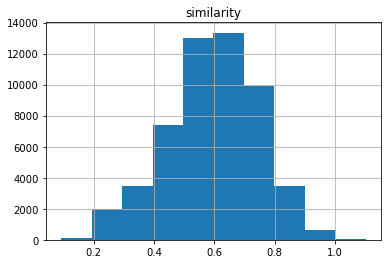

In [26]:
speakers_df = pd.DataFrame.from_dict(speakers, orient='index', columns=['similarity']).sort_values('similarity', ascending=False)
speakers_df.hist()

In [11]:
df.cosine_similarity.count()

2962875

# Sentiment analysis

In [4]:
# Initialize the zer-shot classifier (it will use the default model robert-large-mnli)
classifier = pipeline("zero-shot-classification", device=0)

# Crete the hypothesis we want to use
hypotheses = "The sentiment of this quote is {}."

# Create the labels
the_labels = ["positive", "negative", "neutral"]

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


In [4]:

one_shot_sent = []

# For each sentence, predict the sentiment using both VADER and Zero-Shot and save the sentiment in a column of the dataframe
for idx, item in tqdm(df.iterrows()):
    one_shot_sent.append(classifier(item['quotation'], the_labels, hypothesis_template = hypotheses, multi_label=True)['labels'][0])

df['one-shot sentiment'] = one_shot_sent

10it [00:01, 11.36it/s]/home/simon/anaconda3/envs/ada/lib/python3.8/site-packages/transformers/pipelines/base.py:1077: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
8088it [03:15, 41.38it/s]


KeyboardInterrupt: 

In [5]:
test = classifier(df['quotation'],the_labels, hypotheses=hypotheses,multi_label=True)

KeyboardInterrupt: 

In [23]:
quotes = list(df['quotation'])
keys = KeyDataset(list_of_dict,'quotation')
classified = [quote['labels'][0] for quote in tqdm(classifier(keys, the_labels, hypothesis_template = hypotheses, multi_label=True))]

/home/simon/anaconda3/envs/ada/lib/python3.8/site-packages/transformers/pipelines/base.py:1077: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(

  1%|          | 20196/2962875 [08:12<19:57:05, 40.97it/s]


KeyboardInterrupt: 

In [17]:

classifier(quote, the_labels, hypothesis_template = hypotheses, multi_label=True)